<a href="https://colab.research.google.com/github/RUMONMD89/Deep-learning-project/blob/main/cats_vs_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 25.3MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.7MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout # add Batch Norm  layer & Dropout

In [14]:
#generators

train_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)

test_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
# previous all data in stored is numpy array formate. so we processing data in a normalize .
# data Normalize *(use map function )
def process(image,label):
  image=tf.cast(image/225, tf.float32)
  return image,label

train_ds =train_ds.map(process)
test_ds = test_ds.map(process)



In [16]:
# create CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) #convulation layer
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #pooling layer

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu')) #convulation layer 64(filters)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #pooling layer

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu')) #convulation layer 128(filters)
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) #pooling layer

model.add(Flatten()) #add Flateen layer

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 62s 89ms/step - accuracy: 0.5605 - loss: 3.2702 - val_accuracy: 0.6490 - val_loss: 0.6342
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 83ms/step - accuracy: 0.6613 - loss: 0.6215 - val_accuracy: 0.5078 - val_loss: 0.8706
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7316 - loss: 0.5334 - val_accuracy: 0.7358 - val_loss: 0.5557
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 83ms/step - accuracy: 0.7852 - loss: 0.4602 - val_accuracy: 0.7462 - val_loss: 0.5426
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.8134 - loss: 0.4133 - val_accuracy: 0.7934 - val_loss: 0.4481
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 83ms/step - accuracy: 0.8454 - loss: 0.3397 - val_accuracy: 0.6684 - val_loss: 0.5974
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 89ms/step - accuracy: 0.8832 - loss: 0.2796 - val_accuracy: 0.7666 - val_loss: 0.5543
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.9250 - loss: 0.1903 - 

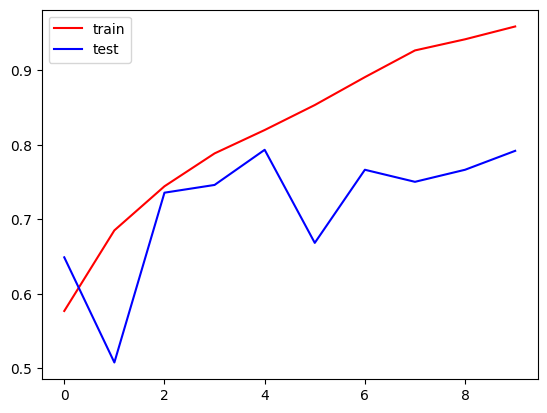

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color ='red',label='train')
plt.plot(history.history['val_accuracy'],color ='blue',label='test')
plt.legend()
plt.show()

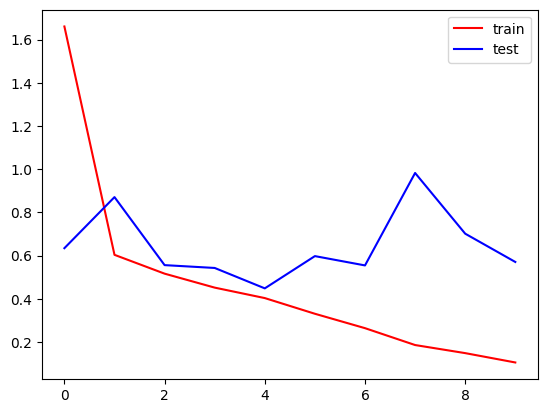

In [56]:
plt.plot(history.history['loss'],color ='red',label='train')
plt.plot(history.history['val_loss'],color ='blue',label='test')
plt.legend()
plt.show()

In [ ]:
# train_data to test_data result gap is high .so that is mean data is overfitting

# ways to reduce overfitting

# add more data
# data Augmentation
# L1/L2 Regularizer (old tecnique)
# Dropout
# Batch Norm
# Reduce complexity

# in this project  now we apply Dropout & Batch Norm tecnique to reduce overfitting

In [22]:
# now we predection new unseen data to download by internet
import cv2

In [40]:
dog_test_img = cv2.imread('/content/net_dog2.jpg')

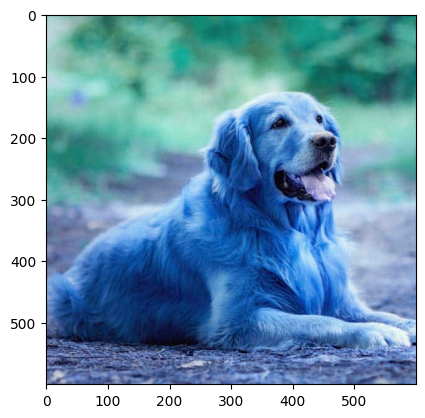

In [41]:
plt.imshow(dog_test_img)

In [42]:
dog_test_img.shape

(600, 600, 3)

In [43]:
test_img = cv2.resize(dog_test_img,(256,256))

In [44]:
dog_test_input =test_img.reshape(1,256,256,3)

In [45]:
model.predict(dog_test_input) # dog sign=1 & prediction result is 1.that mean the result is correct.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[1.]], dtype=float32)

In [46]:
cat_test_img = cv2.imread('/content/net_cat1.jpg')

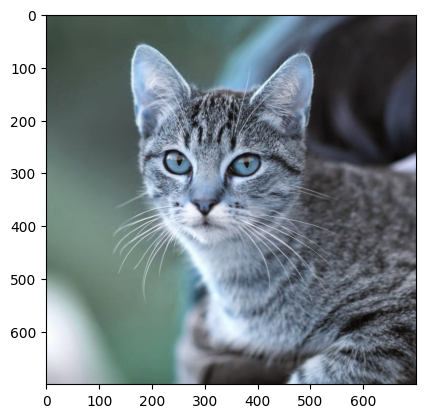

In [47]:
plt.imshow(cat_test_img)

In [49]:
cat_test_img.shape

(700, 700, 3)

In [50]:
test_img=cv2.resize(cat_test_img,(256,256))

In [52]:
cat_test_input = test_img.reshape(1,256,256,3)

In [53]:
model.predict(cat_test_input) # on the other hand, cat sign =0 & prediction result is 0.that mean the result is correct.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.]], dtype=float32)